In [1]:
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import csv
from IPython.core.display import display, HTML
import re

In [2]:
def force_show_all(df):
    """imprime um dataframe completo
    """
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', None):
        display(HTML(df.to_html()))
        
def explode_and_merge(df, col, merge_on='id', split_on=";", topn=None):
    """Transforma um atributo multivalorado em várias linhas de conteúdo atômico, 
       uma linha pra cada um dos atributos separados por ponto e vírgula
    """
    # Cria um novo dataframe
    df_exp = df[[col, merge_on]].assign(**{col: df[col].str.split(split_on)}).explode(col)
    df_merged = df_exp.merge(right=df, on=merge_on, how='left', suffixes=["", "_y"])
    if topn:
        sel_topn = df_merged[col].isin(df_merged[col].value_counts().head(topn).index)
        df_merged = df_merged[sel_topn]
    return df_merged


In [3]:
%run ./load_datasets.ipynb
dfd = load_dealroom()

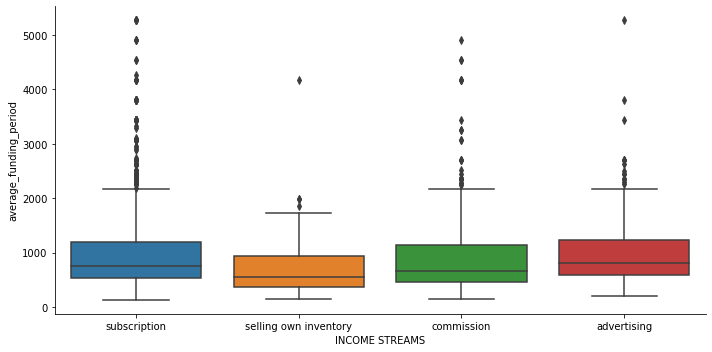

In [413]:
# Plota um boxplot do atributo INCOME STREAMS
df_income_streams = explode_and_merge(df=dfd, col='INCOME STREAMS', merge_on='id', split_on=";")
sns.catplot(y="average_funding_period", data=df_income_streams, kind="box", x="INCOME STREAMS", aspect=2)

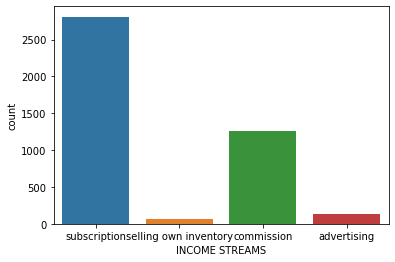

In [131]:
# Plota a contagem de elementos em cada categoria do atributo INCOME STREAMS
sns.countplot(data = df_income_streams, x="INCOME STREAMS")

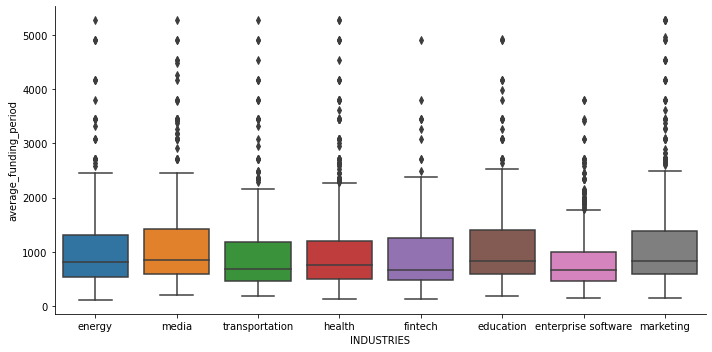

In [231]:
# Plota um boxplot do atributo INDUSTRIES
df_ind = explode_and_merge(df=dfd, col='INDUSTRIES', merge_on='id')
dfd_relevant_ind = df_ind[df_ind['INDUSTRIES'].isin(['energy', 'media', 'transportation', 'health', 'fintech', 'education', 'enterprise software', 'marketing'])]
ax = sns.catplot(y="average_funding_period", data=dfd_relevant_ind, kind="box", x="INDUSTRIES", aspect=2)

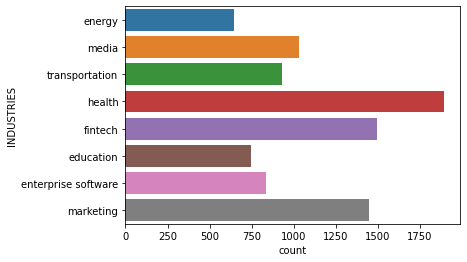

In [133]:
# Plota a contagem de elementos em cada categoria do atributo INDUSTRIES
sns.countplot(data = dfd_relevant_ind, y="INDUSTRIES")

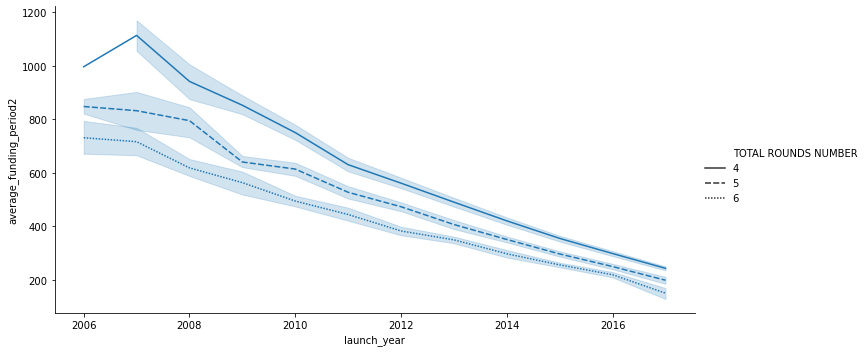

In [248]:
# Plota o gráfico de linhas do average_funding_period2 vs tempo (anos), agrupado 
#   pela quantidade de rodadas de investimento que as empresas conseguiram captar.
# Perceba que não existe um valor fixo "normal" para o prazo médio das etapas de investimento.
#   Esse prazo tem diminuído ao longo dos anos.
ax = sns.relplot(x="launch_year", data=dfd, kind="line", y="average_funding_period2", aspect=2, 
                 style="TOTAL ROUNDS NUMBER", style_order=[4,5,6])

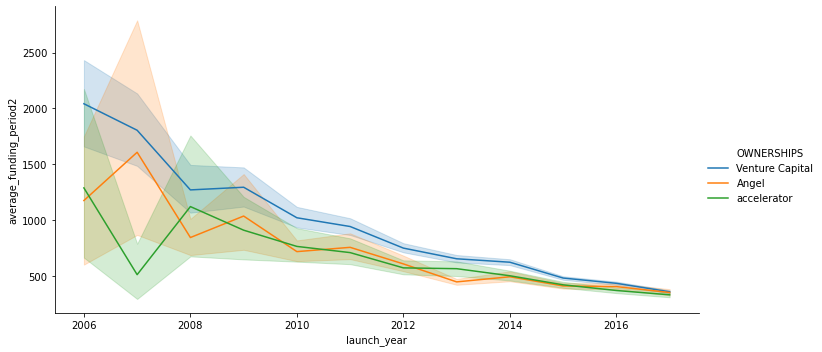

In [260]:
# Transforma um atributo multivalorado em várias linhas de conteúdo atômico, 
#   uma linha pra cada um dos atributos separados por ponto e vírgula
df_ownership = explode_and_merge(df=dfd, col='OWNERSHIPS', merge_on='id')
# Plota o gráfico de linhas do average_funding_period2 vs tempo (anos), agrupado 
#   pelo tipo de OWNERSHIPS
ax = sns.relplot(x="launch_year", data=df_ownership, kind="line", y="average_funding_period2", aspect=2, 
                 hue="OWNERSHIPS", hue_order=pd.value_counts(df_ownership['OWNERSHIPS']).iloc[:3].index)

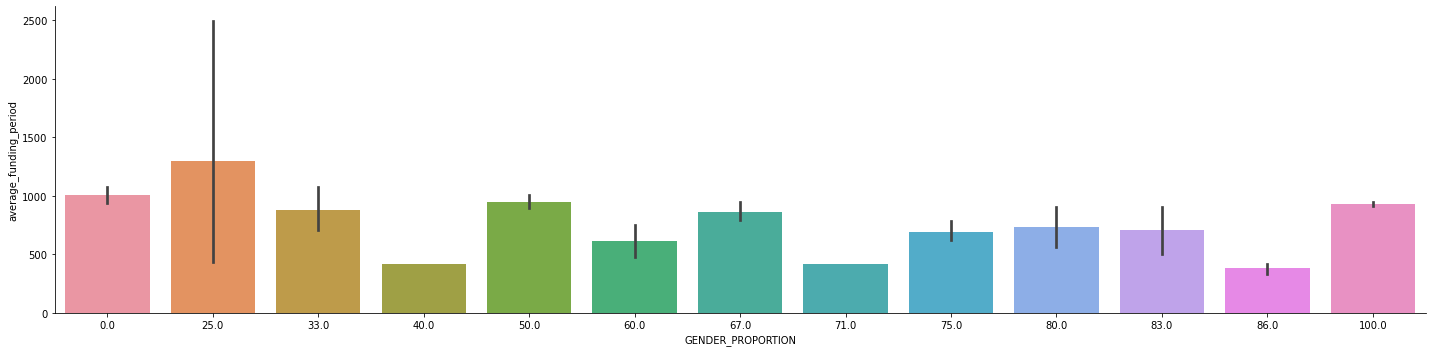

In [194]:
# Plota o gráfico do average_funding_period2 vs a proporção de homens/mulheres nas empresas
sns.catplot(y="average_funding_period2", data=dfd, kind="bar", x="GENDER_PROPORTION", aspect=4)

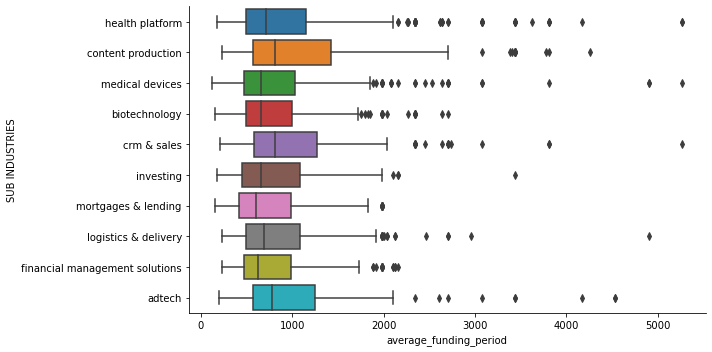

In [138]:
# Plota um boxplot do atributo SUB INDUSTRIES
df_sub_ind = explode_and_merge(df=dfd, col='SUB INDUSTRIES', merge_on='id')
ax = sns.catplot(x="average_funding_period", data=df_sub_ind, kind="box", y='SUB INDUSTRIES', aspect=2,
                order=pd.value_counts(df_sub_ind['SUB INDUSTRIES']).iloc[:10].index)

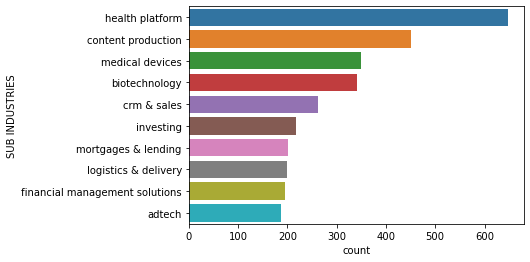

In [393]:
# Plota a contagem dos elementos do atributo SUB INDUSTRIES. 
# Apenas das 10 categorias com mais elementos.
sns.countplot(data=df_sub_ind, y='SUB INDUSTRIES', order=df_sub_ind['SUB INDUSTRIES'].value_counts().head(10).index)

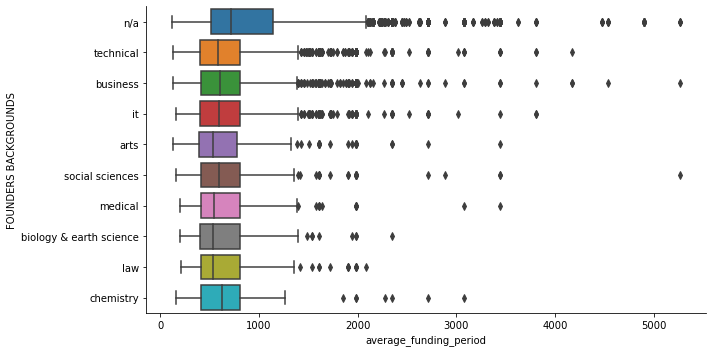

In [173]:
# Transforma um atributo multivalorado em várias linhas de conteúdo atômico, 
#   uma linha pra cada um dos atributos separados por ponto e vírgula
df_bg  = explode_and_merge(df=dfd, col='FOUNDERS BACKGROUNDS', merge_on='id')
# Plota um boxplot do atributo FOUNDERS BACKGROUNDS
ax = sns.catplot(x="average_funding_period", data=df_bg, kind="box", y="FOUNDERS BACKGROUNDS", aspect=2,
                order=pd.value_counts(df_bg['FOUNDERS BACKGROUNDS']).iloc[:10].index)

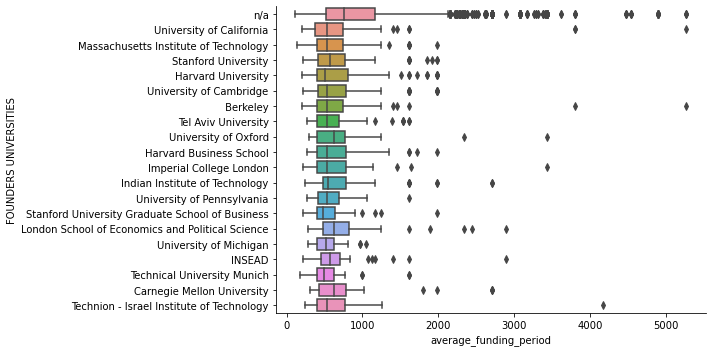

In [172]:
# Transforma um atributo multivalorado em várias linhas de conteúdo atômico, 
#   uma linha pra cada um dos atributos separados por ponto e vírgula
df_bg  = explode_and_merge(df=dfd, col='FOUNDERS UNIVERSITIES', merge_on='id')
ax = sns.catplot(x="average_funding_period", data=df_bg, kind="box", y="FOUNDERS UNIVERSITIES", aspect=2,
                order=pd.value_counts(df_bg['FOUNDERS UNIVERSITIES']).iloc[:20].index)

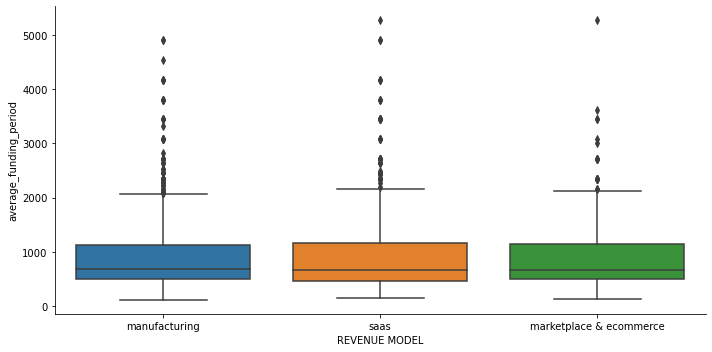

In [185]:
# Transforma um atributo multivalorado em várias linhas de conteúdo atômico, 
#   uma linha pra cada um dos atributos separados por ponto e vírgula
df_revenue_model = explode_and_merge(df=dfd, col='REVENUE MODEL', merge_on='id')
ax = sns.catplot(y="average_funding_period", data=df_revenue_model, kind="box", x="REVENUE MODEL", aspect=2)

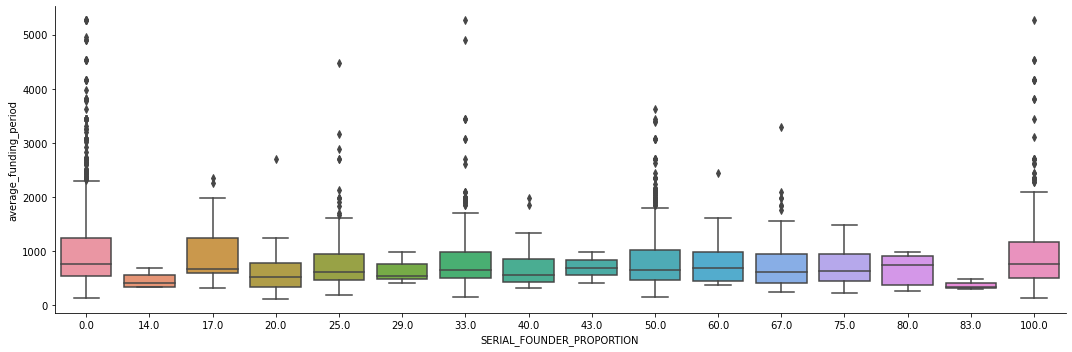

In [195]:
ax = sns.catplot(y="average_funding_period", data=dfd, kind="box", x="SERIAL_FOUNDER_PROPORTION", aspect=3)

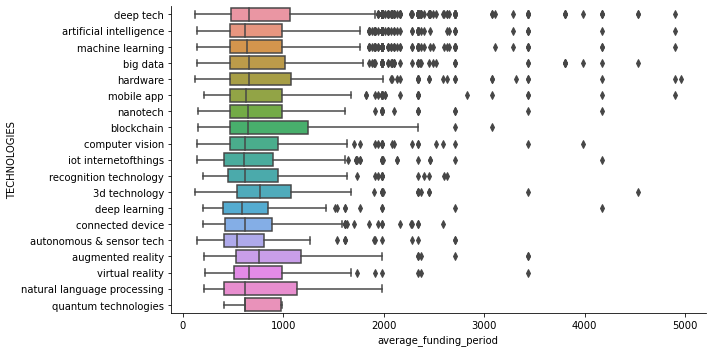

In [200]:
# Transforma um atributo multivalorado em várias linhas de conteúdo atômico, 
#   uma linha pra cada um dos atributos separados por ponto e vírgula
df_tech = explode_and_merge(df=dfd, col='TECHNOLOGIES', merge_on='id')
ax = sns.catplot(x="average_funding_period", data=df_tech, kind="box", y="TECHNOLOGIES", aspect=2,
                order=pd.value_counts(df_tech['TECHNOLOGIES']).iloc[:20].index)

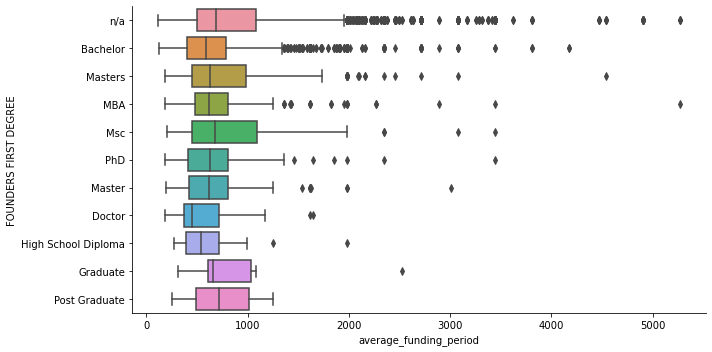

In [202]:
# Transforma um atributo multivalorado em várias linhas de conteúdo atômico, 
#   uma linha pra cada um dos atributos separados por ponto e vírgula
df_first_degree = explode_and_merge(df=dfd, col='FOUNDERS FIRST DEGREE', merge_on='id')
ax = sns.catplot(x="average_funding_period", data=df_first_degree, kind="box", y="FOUNDERS FIRST DEGREE", aspect=2,
                order=pd.value_counts(df_first_degree['FOUNDERS FIRST DEGREE']).iloc[:20].index)

In [439]:
# Transforma um atributo multivalorado em várias linhas de conteúdo atômico, 
#   uma linha pra cada um dos atributos separados por ponto e vírgula
col="EACH ROUND INVESTORS"
merge_on="id"
dfd[col].replace(r"\+\+", ";", inplace=True, regex=True)
df_exp = dfd[[col, merge_on]].assign(**{col: dfd[col].str.split(";")}).explode(col)
df_merged = df_exp.merge(right=dfd, on=merge_on, how='left', suffixes=["", "_y"])

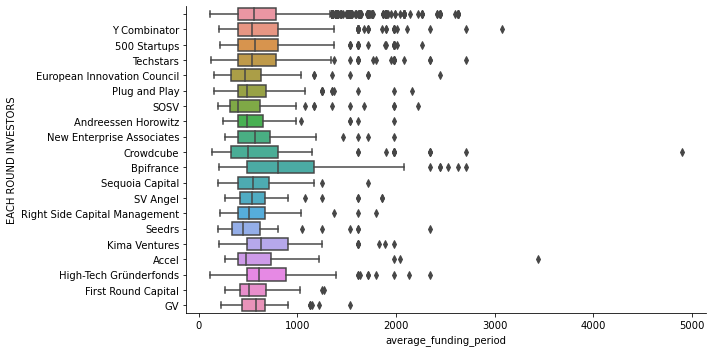

In [440]:
# Plota o boxplot de average_funding_period vs EACH ROUND INVESTORS
sns.catplot(x="average_funding_period", data=df_merged, kind="box", y=col, aspect=2,
                order=pd.value_counts(df_merged[col]).iloc[:20].index)

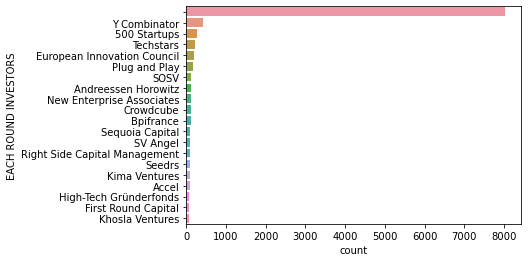

In [311]:
# Plota a contagem da quantidade de investimentos de cada investidor
sns.countplot(data = df_merged, y=col, order=pd.value_counts(df_merged[col]).iloc[:20].index)

In [446]:
# Extrair os valores do 1o e 3o quartil do tempo médio das rodadas de investimento, 
#    para cada ano de lançamento
quartis = dfd[["average_funding_period2", "launch_year"]].groupby("launch_year").quantile([0.25, 0.75])
quartis.head(6)

average_funding_period2
launch_year                              
2006        0.25               659.955357
            0.75              1986.250000
2007        0.25               589.821429
            0.75              1902.500000
2008        0.25               588.291667
            0.75              1357.000000

In [447]:
# Função de classificação das amostras
#   1 : Empresas que estão acima do percentil 75; 
#   0 : Empresas que estão entre o percentil 25 e 75;
#  -1 : Empresas que estão abaixo do percentil 25;
def classify_afp(afp, year, q):
    if afp > q.loc[int(year), 0.75]['average_funding_period2']:
        return 1
#     elif afp < q.loc[int(year), 0.25]['average_funding_period2']:
#         return -1
    else:
        return 0
    

In [448]:
# Fazendo a categorização das empresas
dfd['class'] = dfd[["average_funding_period2", "launch_year"]].apply(lambda x: classify_afp(x.average_funding_period2, x.launch_year, quartis), axis=1) 
print(dfd.shape)
dfd.dropna(subset=['class', 'FOUNDERS FIRST DEGREE', 'TECHNOLOGIES'], inplace=True)
print(dfd.shape)
dfd['FOUNDERS FIRST DEGREE'] = dfd['FOUNDERS FIRST DEGREE'].str.replace('PhD', 'Doctor')
dfd['FOUNDERS FIRST DEGREE'] = dfd['FOUNDERS FIRST DEGREE'].str.replace('Bachelor', 'Graduate')
dfd['FOUNDERS FIRST DEGREE'] = dfd['FOUNDERS FIRST DEGREE'].str.replace('Msc', 'Masters')
dfd['FOUNDERS FIRST DEGREE'] = dfd['FOUNDERS FIRST DEGREE'].str.replace('Post Graduate', 'MBA')


(9655, 65)
(2432, 65)


In [452]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import jaccard_score, f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_fscore_support


def clf_random_forest(dfc):
    X = dfc.iloc[:, 0:-1]
    y = dfc.iloc[:, -1]
    classifier = RandomForestClassifier(n_estimators=20, random_state=0)
    def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
    def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
    def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
    def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

    scoring = {'tp': make_scorer(tp), #'tn': make_scorer(tn), 'fn': make_scorer(fn)
               'fp': make_scorer(fp)}
    cv_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
    tp = np.sum(cv_results['test_tp'])
#     tn = np.sum(cv_results['test_tn'])
    fp = np.sum(cv_results['test_fp'])
#     fn = np.sum(cv_results['test_fn'])
    return tp/(tp+fp)

In [453]:
# Seleciona os atributos de interesse
def experiment(attr_list, df):
    dfd2 = df[['class'] + attr_list]
    concat_list = []
    # Transforma cada um dos atributos multivalorados de attr_list em várias linhas de conteúdo atômico
    for a in attr_list:
        concat_list.append(dfd2[a].str.get_dummies(sep=";"))
        del dfd2[a]
    concat_list.append(dfd2)
    dfd2 = pd.concat(concat_list, axis=1)
    if 'n/a' in dfd2.columns:
        del dfd2['n/a']
    sel_cols = (dfd2.abs().sum() > 30) 
    dfd2 = dfd2.loc[:, sel_cols]
    return clf_random_forest(dfd2)

In [ ]:
import itertools

stuff = dfd.columns.to_list()
setA = set(dfd.columns.to_list())
setB = set(['class', 'id', 'NAME', 'PROFILE URL', 'TAGLINE', 'LAUNCH DATE', 'TAGS',
            'VALUATION', 'VALUATION DATE', 'TECH STACK DATA (BY PREDICTLEADS)', 'N_MALES', 'N_FEMALES',
            'last_funding_date', 'last_funding_year', 'last_funding_period_years', 'last_funding_period_days',
            'last_funding_period_days2', 'average_funding_period', 'average_funding_period2',
            'EACH ROUND CURRENCY', 'EACH ROUND DATE', 'FIRST FUNDING DATE', 'LAST FUNDING DATE',
           'EMPLOYEES (2016;2017;2018;2019;2020)', 'PROFIT (2016;2017;2018;2019)', 'FOUNDING LOCATION', 
            'HQ REGION', 'REVENUE (2016;2017;2018;2019)', 'TOTAL ROUNDS NUMBER', 'FOUNDERS GENDERS',
           'N_MALE', 'N_FEMALE', 'launch_date', 'CLOSING DATE', 'FOUNDERS FIRST DEGREE YEAR', 'N_SERIAL_FOUNDER',
           'DELIVERY METHOD', 'launch_year', 'SEED YEAR', 'GROWTH STAGE', 'N_NOT_SERIAL_FOUNDER', 'COMPANY STATUS',
           'EMPLOYEES', 'TOTAL FUNDING (EUR M)', 'FOUNDERS', 'EACH ROUND AMOUNT', 'LAST FUNDING',
           'FOUNDERS IS SERIAL', 'LAST ROUND', 'EACH ROUND INVESTORS', 'EACH ROUND TYPE', 'SERIAL_FOUNDER_PROPORTION'])

# Get new set with elements that are only in a but not in b
onlyInA = list(setA.difference(setB))
print(onlyInA)
concat_list = []
dfd_copy = dfd.copy()
best_score = 0
count = 0
for L in range(4, len(onlyInA)+1):
    for subset in itertools.combinations(onlyInA, L):
        count += 1
        tmp_score = experiment(attr_list, dfd)
        if count % 1000 == 0:
            print(subset)
        if tmp_score > best_score:
            best_score = tmp_score
            print("#"*40)
            print("#"*40)
            print("#"*40)
            print(subset, best_score)
            print("#"*40)
            print("#"*40)
            print("#"*40)
print(subset, best_score)   

['B2B/B2C', 'OWNERSHIPS', 'GENDER_PROPORTION', 'REVENUE MODEL', 'INCOME STREAMS', 'FOUNDERS UNIVERSITIES', 'INDUSTRIES', 'TECHNOLOGIES', 'FOUNDERS FIRST DEGREE', 'EACH INVESTOR TYPES', 'FOUNDERS BACKGROUNDS', 'SUB INDUSTRIES', 'FOUNDERS STATUSES', 'FOUNDERS COMPANY EXPERIENCE', 'HQ COUNTRY']
########################################
########################################
########################################
('B2B/B2C', 'OWNERSHIPS', 'GENDER_PROPORTION', 'REVENUE MODEL') 0.13740458015267176
########################################
########################################
########################################
('REVENUE MODEL', 'TECHNOLOGIES', 'FOUNDERS COMPANY EXPERIENCE', 'HQ COUNTRY')
('B2B/B2C', 'REVENUE MODEL', 'TECHNOLOGIES', 'FOUNDERS STATUSES', 'HQ COUNTRY')
('OWNERSHIPS', 'INDUSTRIES', 'EACH INVESTOR TYPES', 'FOUNDERS STATUSES', 'HQ COUNTRY')
('INCOME STREAMS', 'INDUSTRIES', 'TECHNOLOGIES', 'EACH INVESTOR TYPES', 'FOUNDERS COMPANY EXPERIENCE')
('B2B/B2C', 'OWNERSHIPS', 'I

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-454-4721d1baac18>", line 27, in <module>
    tmp_score = experiment(attr_list, dfd)
  File "<ipython-input-453-14896c98bf78>", line 7, in experiment
    concat_list.append(dfd2[a].str.get_dummies(sep=";"))
  File "C:\Users\alex\anaconda3\lib\site-packages\pandas\core\strings.py", line 1954, in wrapper
    return func(self, *args, **kwargs)
  File "C:\Users\alex\anaconda3\lib\site-packages\pandas\core\strings.py", line 3013, in get_dummies
    return self._wrap_result(
  File "C:\Users\alex\anaconda3\lib\site-packages\pandas\core\strings.py", line 2213, in _wrap_result
    result = cons(result, columns=name, index=index, dtype=dtype)
  File "C:\Users\alex\anaconda3\lib\site-packages\pandas\core\frame.py", line 474, in __init__
    arrays, columns = to_arrays(data, column

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\alex\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-454-4721d1baac18>", line 27, in <module>
    tmp_score = experiment(attr_list, dfd)
  File "<ipython-input-453-14896c98bf78>", line 7, in experiment
    concat_list.append(dfd2[a].str.get_dummies(sep=";"))
  File "C:\Users\alex\anaconda3\lib\site-packages\pandas\core\strings.py", line 1954, in wrapper
    return func(self, *args, **kwargs)
  File "C:\Users\alex\anaconda3\lib\site-packages\pandas\core\strings.py", line 3013, in get_dummies
    return self._wrap_result(
  File "C:\Users\alex\anaconda3\lib\site-packages\pandas\core\strings.py", line 2213, in _wrap_result
    result = cons(result, columns=name, index=index, dtype=dtype)
  File "C:\Users\alex\anaconda3\lib\site-packages\pandas\core\frame.py", line 474, in __init__
    arrays, columns = to_arrays(data, column